### N. Vishnu Vardhan Reddy
### Malla Reddy University
### CSE

In [1]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Test").getOrCreate()

In [2]:
data = spark.read.csv("MIDMARKS.csv", header=True)
data.show()
data.printSchema()

+----+-------+---+----+---+----+---+----+
|S.NO|SECTION| DV|M-II| PP|BEEE| FL|FIMS|
+----+-------+---+----+---+----+---+----+
|   1|  ALPHA| 12|   0| 17|   9| 19|  15|
|   2|  ALPHA| 19|  12| 16|  16| 18|   3|
|   3|  ALPHA| 18|  14| 18|  18| 18|  16|
|   4|  ALPHA| 15|   9| 19|  17| 19|  15|
|   5|  ALPHA| 18|  17| 19|  19| 20|  18|
|   6|  ALPHA| 17|  16| 18|  10| 15|   9|
|   7|  ALPHA| 15|  10| 20|  20| 15|  14|
|   8|  ALPHA| 17|  17| 19|  20| 19|  13|
|   9|  ALPHA| 10|  18|  A|  20| 19|  15|
|  10|  ALPHA| 18|  19| 20|  20| 20|  15|
|  11|  ALPHA| 17|  18| 20|  18| 20|  18|
|  12|  ALPHA| 20|  20| 20|  20| 19|  16|
|  13|  ALPHA| 16|  18| 11|  15| 19|  15|
|  14|  ALPHA| 17|  17| 18|  11| 15|   9|
|  15|  ALPHA| 19|  20| 20|  20| 18|  12|
|  16|  ALPHA| 13|  18| 17|  19| 16|   9|
|  17|  ALPHA| 15|  17| 18|  17| 17|  13|
|  18|  ALPHA| 11|   8| 18|  15| 19|  15|
|  19|  ALPHA| 14|  12| 16|  16| 20|  14|
|  20|  ALPHA| 19|  17| 20|  20| 20|  18|
+----+-------+---+----+---+----+--

#### HANDLING NULL VALUES

In [4]:
subject_columns = ["DV", "M-II", "PP", "BEEE", "FL", "FIMS"]

In [5]:
from pyspark.sql.functions import col, when

In [6]:
for col_name in subject_columns:
    data = data.withColumn(
        col_name,
        when(col(col_name).isin("A", "AB", "MP", None), 0)
        .otherwise(col(col_name).cast("int"))
    )

In [7]:
data.printSchema()
data.show()

root
 |-- S.NO: string (nullable = true)
 |-- SECTION: string (nullable = true)
 |-- DV: integer (nullable = true)
 |-- M-II: integer (nullable = true)
 |-- PP: integer (nullable = true)
 |-- BEEE: integer (nullable = true)
 |-- FL: integer (nullable = true)
 |-- FIMS: integer (nullable = true)

+----+-------+---+----+---+----+---+----+
|S.NO|SECTION| DV|M-II| PP|BEEE| FL|FIMS|
+----+-------+---+----+---+----+---+----+
|   1|  ALPHA| 12|   0| 17|   9| 19|  15|
|   2|  ALPHA| 19|  12| 16|  16| 18|   3|
|   3|  ALPHA| 18|  14| 18|  18| 18|  16|
|   4|  ALPHA| 15|   9| 19|  17| 19|  15|
|   5|  ALPHA| 18|  17| 19|  19| 20|  18|
|   6|  ALPHA| 17|  16| 18|  10| 15|   9|
|   7|  ALPHA| 15|  10| 20|  20| 15|  14|
|   8|  ALPHA| 17|  17| 19|  20| 19|  13|
|   9|  ALPHA| 10|  18|  0|  20| 19|  15|
|  10|  ALPHA| 18|  19| 20|  20| 20|  15|
|  11|  ALPHA| 17|  18| 20|  18| 20|  18|
|  12|  ALPHA| 20|  20| 20|  20| 19|  16|
|  13|  ALPHA| 16|  18| 11|  15| 19|  15|
|  14|  ALPHA| 17|  17| 18|  11

In [8]:
data.groupBy("SECTION").count().show()

+-------+-----+
|SECTION|count|
+-------+-----+
|   GAMA|    1|
|   ZETA|   19|
|   SGMA|    1|
|   NULL|   41|
|   BETA|   60|
|  OMEGA|   60|
|EPSILON|   60|
|  SIGMA|   59|
|  ALPHA|   60|
|  GAMMA|   59|
|  DELTA|   60|
+-------+-----+



In [9]:
data = data.na.fill({"SECTION": "ZETA"})

In [10]:
data.groupBy("SECTION").count().show()

+-------+-----+
|SECTION|count|
+-------+-----+
|   GAMA|    1|
|   ZETA|   60|
|   SGMA|    1|
|   BETA|   60|
|  OMEGA|   60|
|EPSILON|   60|
|  SIGMA|   59|
|  ALPHA|   60|
|  GAMMA|   59|
|  DELTA|   60|
+-------+-----+



In [11]:
from pyspark.sql.functions import when, col
data = data.withColumn(
"SECTION",
when(col("SECTION") == "GAMA", "GAMMA")
.when(col("SECTION") == "SGMA", "SIGMA")
.otherwise(col("SECTION"))
)

In [12]:
data.groupBy("SECTION").count().show()

+-------+-----+
|SECTION|count|
+-------+-----+
|   ZETA|   60|
|   BETA|   60|
|  OMEGA|   60|
|EPSILON|   60|
|  SIGMA|   60|
|  ALPHA|   60|
|  GAMMA|   60|
|  DELTA|   60|
+-------+-----+



In [13]:
data.groupBy("DV").count().show()

+----+-----+
|  DV|count|
+----+-----+
|  12|   27|
|NULL|    3|
|   1|    3|
|  13|   25|
|  16|   48|
|   6|    9|
|   3|    1|
|  20|   52|
|   5|    8|
|  19|   37|
|  15|   45|
|  17|   52|
|   9|   14|
|   4|    3|
|   8|   10|
|   7|    6|
|  10|   22|
|  11|   31|
|  14|   24|
|   2|    4|
+----+-----+
only showing top 20 rows



In [14]:
data = data.na.fill({"DV": "0"})

In [15]:
data.groupBy("DV").count().show()

+---+-----+
| DV|count|
+---+-----+
| 12|   27|
|  1|    3|
| 13|   25|
| 16|   48|
|  6|    9|
|  3|    1|
| 20|   52|
|  5|    8|
| 19|   37|
| 15|   45|
| 17|   52|
|  9|   14|
|  4|    3|
|  8|   10|
|  7|    6|
| 10|   22|
| 11|   31|
| 14|   24|
|  2|    4|
|  0|   12|
+---+-----+
only showing top 20 rows



In [16]:
data.groupBy("M-II").count().show()

+----+-----+
|M-II|count|
+----+-----+
|  12|   23|
|NULL|   10|
|   1|   16|
|  13|   18|
|  16|   16|
|   6|   18|
|   3|   34|
|  20|   44|
|   5|   23|
|  19|   12|
|  15|   24|
|   9|   17|
|  17|   32|
|   4|   22|
|   8|   29|
|   7|   14|
|  10|   19|
|  11|   24|
|  14|   17|
|   2|   12|
+----+-----+
only showing top 20 rows



In [17]:
data = data.na.fill({"M-II": 0})

In [18]:
data.groupBy("M-II").count().show()

+----+-----+
|M-II|count|
+----+-----+
|  12|   23|
|   1|   16|
|  13|   18|
|  16|   16|
|   6|   18|
|   3|   34|
|  20|   44|
|   5|   23|
|  19|   12|
|  15|   24|
|   9|   17|
|  17|   32|
|   4|   22|
|   8|   29|
|   7|   14|
|  10|   19|
|  11|   24|
|  14|   17|
|   2|   12|
|   0|   43|
+----+-----+
only showing top 20 rows



In [19]:
data.groupBy("PP").count().show()

+---+-----+
| PP|count|
+---+-----+
| 12|   28|
|  1|    7|
| 13|   15|
| 16|   28|
|  6|   18|
|  3|   13|
| 20|   70|
|  5|   15|
| 19|   35|
| 15|   26|
| 17|   31|
|  9|   24|
|  4|   10|
|  8|   12|
|  7|   10|
| 10|   19|
| 11|   28|
| 14|   28|
|  2|   13|
|  0|   15|
+---+-----+
only showing top 20 rows



In [20]:
data.groupBy("BEEE").count().show()

+----+-----+
|BEEE|count|
+----+-----+
|  12|   21|
|NULL|    5|
|   1|    3|
|  13|   14|
|  16|   23|
|   6|   14|
|   3|   14|
|  20|   76|
|   5|   10|
|  19|   41|
|  15|   28|
|   9|   19|
|  17|   45|
|   4|   12|
|   8|   13|
|   7|   15|
|  10|   20|
|  11|   31|
|  14|   21|
|   2|    9|
+----+-----+
only showing top 20 rows



In [21]:
data = data.na.fill({"BEEE": 0})

In [22]:
data.groupBy("BEEE").count().show()

+----+-----+
|BEEE|count|
+----+-----+
|  12|   21|
|   1|    3|
|  13|   14|
|  16|   23|
|   6|   14|
|   3|   14|
|  20|   76|
|   5|   10|
|  19|   41|
|  15|   28|
|   9|   19|
|  17|   45|
|   4|   12|
|   8|   13|
|   7|   15|
|  10|   20|
|  11|   31|
|  14|   21|
|   2|    9|
|   0|   21|
+----+-----+
only showing top 20 rows



In [23]:
data.groupBy("FL").count().show()

+----+-----+
|  FL|count|
+----+-----+
|  12|    7|
|NULL|    2|
|  13|   50|
|  16|   15|
|   6|    2|
|  20|  120|
|  19|   34|
|  15|   85|
|  17|    9|
|   9|    3|
|   8|    6|
|   7|    2|
|  10|   55|
|  11|   10|
|  14|   11|
|   0|   11|
|  18|   58|
+----+-----+



In [24]:
data = data.na.fill({"FL": 0})

In [25]:
data.groupBy("FL").count().show()

+---+-----+
| FL|count|
+---+-----+
| 12|    7|
| 13|   50|
| 16|   15|
|  6|    2|
| 20|  120|
| 19|   34|
| 15|   85|
| 17|    9|
|  9|    3|
|  8|    6|
|  7|    2|
| 10|   55|
| 11|   10|
| 14|   11|
|  0|   13|
| 18|   58|
+---+-----+



In [26]:
data.groupBy("FIMS").count().show()

+----+-----+
|FIMS|count|
+----+-----+
|  12|   20|
|NULL|    2|
|   1|    3|
|  13|   36|
|  16|   49|
|   6|    5|
|   3|    6|
|  20|   12|
|   5|    5|
|  19|   34|
|  15|   57|
|   9|   28|
|  17|   40|
|   4|    5|
|   8|   11|
|   7|    5|
|  10|   18|
|  11|   22|
|  14|   40|
|   2|    3|
+----+-----+
only showing top 20 rows



In [27]:
data = data.na.fill({"FIMS": 0})

In [28]:
data.groupBy("FIMS").count().show()

+----+-----+
|FIMS|count|
+----+-----+
|  12|   20|
|   1|    3|
|  13|   36|
|  16|   49|
|   6|    5|
|   3|    6|
|  20|   12|
|   5|    5|
|  19|   34|
|  15|   57|
|   9|   28|
|  17|   40|
|   4|    5|
|   8|   11|
|   7|    5|
|  10|   18|
|  11|   22|
|  14|   40|
|   2|    3|
|   0|   19|
+----+-----+
only showing top 20 rows



# Creating a Total Column

In [30]:
# TOTAL CALCULATION
from pyspark.sql.functions import col
data = data.withColumn(
    "TOTAL",
    col("DV") + col("M-II") + col("PP") + col("BEEE") + col("FL") + col("FIMS")
)
data.show()

+----+-------+---+----+---+----+---+----+-----+
|S.NO|SECTION| DV|M-II| PP|BEEE| FL|FIMS|TOTAL|
+----+-------+---+----+---+----+---+----+-----+
|   1|  ALPHA| 12|   0| 17|   9| 19|  15|   72|
|   2|  ALPHA| 19|  12| 16|  16| 18|   3|   84|
|   3|  ALPHA| 18|  14| 18|  18| 18|  16|  102|
|   4|  ALPHA| 15|   9| 19|  17| 19|  15|   94|
|   5|  ALPHA| 18|  17| 19|  19| 20|  18|  111|
|   6|  ALPHA| 17|  16| 18|  10| 15|   9|   85|
|   7|  ALPHA| 15|  10| 20|  20| 15|  14|   94|
|   8|  ALPHA| 17|  17| 19|  20| 19|  13|  105|
|   9|  ALPHA| 10|  18|  0|  20| 19|  15|   82|
|  10|  ALPHA| 18|  19| 20|  20| 20|  15|  112|
|  11|  ALPHA| 17|  18| 20|  18| 20|  18|  111|
|  12|  ALPHA| 20|  20| 20|  20| 19|  16|  115|
|  13|  ALPHA| 16|  18| 11|  15| 19|  15|   94|
|  14|  ALPHA| 17|  17| 18|  11| 15|   9|   87|
|  15|  ALPHA| 19|  20| 20|  20| 18|  12|  109|
|  16|  ALPHA| 13|  18| 17|  19| 16|   9|   92|
|  17|  ALPHA| 15|  17| 18|  17| 17|  13|   97|
|  18|  ALPHA| 11|   8| 18|  15| 19|  15

In [31]:
data.groupBy("TOTAL").count().show()

+-----+-----+
|TOTAL|count|
+-----+-----+
|   31|    3|
|   85|    7|
|   65|    5|
|   53|    2|
|   78|    9|
|  108|    5|
|   34|    2|
|  115|    4|
|  101|    6|
|   81|   13|
|   28|    2|
|   76|    5|
|   26|    4|
|   44|    3|
|  103|   12|
|   91|    8|
|   93|    4|
|  111|    9|
|   47|    2|
|   52|    4|
+-----+-----+
only showing top 20 rows



# Creating a Percentage Column

In [33]:

data = data.withColumn(
    "percentage",
    (col("total") / 120) * 100
)

from pyspark.sql.functions import round
data = data.withColumn("percentage", round(col("percentage"), 2))

data.show()

+----+-------+---+----+---+----+---+----+-----+----------+
|S.NO|SECTION| DV|M-II| PP|BEEE| FL|FIMS|TOTAL|percentage|
+----+-------+---+----+---+----+---+----+-----+----------+
|   1|  ALPHA| 12|   0| 17|   9| 19|  15|   72|      60.0|
|   2|  ALPHA| 19|  12| 16|  16| 18|   3|   84|      70.0|
|   3|  ALPHA| 18|  14| 18|  18| 18|  16|  102|      85.0|
|   4|  ALPHA| 15|   9| 19|  17| 19|  15|   94|     78.33|
|   5|  ALPHA| 18|  17| 19|  19| 20|  18|  111|      92.5|
|   6|  ALPHA| 17|  16| 18|  10| 15|   9|   85|     70.83|
|   7|  ALPHA| 15|  10| 20|  20| 15|  14|   94|     78.33|
|   8|  ALPHA| 17|  17| 19|  20| 19|  13|  105|      87.5|
|   9|  ALPHA| 10|  18|  0|  20| 19|  15|   82|     68.33|
|  10|  ALPHA| 18|  19| 20|  20| 20|  15|  112|     93.33|
|  11|  ALPHA| 17|  18| 20|  18| 20|  18|  111|      92.5|
|  12|  ALPHA| 20|  20| 20|  20| 19|  16|  115|     95.83|
|  13|  ALPHA| 16|  18| 11|  15| 19|  15|   94|     78.33|
|  14|  ALPHA| 17|  17| 18|  11| 15|   9|   87|      72.

In [34]:
data.groupBy("percentage").count().show()

+----------+-----+
|percentage|count|
+----------+-----+
|      47.5|    2|
|      70.0|   12|
|       0.0|    7|
|     49.17|    4|
|      3.33|    1|
|     76.67|   10|
|     28.33|    2|
|     98.33|    3|
|     73.33|    5|
|      97.5|    7|
|      67.5|   13|
|      52.5|   10|
|     25.83|    3|
|      82.5|    4|
|     83.33|    6|
|      75.0|    6|
|      92.5|    9|
|     70.83|    7|
|     23.33|    2|
|      35.0|    3|
+----------+-----+
only showing top 20 rows



# Creating a grade column and assigning grades

In [36]:
# GRADE CALCULATION
data = data.withColumn(
    "grade",
    when(col("percentage") >= 90, "A+")
    .when(col("percentage") >= 80, "A")
    .when(col("percentage") >= 70, "B")
    .when(col("percentage") >= 60, "C")
    .when(col("percentage") >= 50, "D")
    .otherwise("F")
)
data.select("total", "percentage", "grade").show()

+-----+----------+-----+
|total|percentage|grade|
+-----+----------+-----+
|   72|      60.0|    C|
|   84|      70.0|    B|
|  102|      85.0|    A|
|   94|     78.33|    B|
|  111|      92.5|   A+|
|   85|     70.83|    B|
|   94|     78.33|    B|
|  105|      87.5|    A|
|   82|     68.33|    C|
|  112|     93.33|   A+|
|  111|      92.5|   A+|
|  115|     95.83|   A+|
|   94|     78.33|    B|
|   87|      72.5|    B|
|  109|     90.83|   A+|
|   92|     76.67|    B|
|   97|     80.83|    A|
|   86|     71.67|    B|
|   92|     76.67|    B|
|  114|      95.0|   A+|
+-----+----------+-----+
only showing top 20 rows



In [37]:
data.groupBy("grade").count().show()

+-----+-----+
|grade|count|
+-----+-----+
|    F|   97|
|    B|   96|
|    D|   71|
|    C|   78|
|    A|   76|
|   A+|   62|
+-----+-----+



# Creating a Programming Skills Column and giving remarks

In [39]:
#PROGRAMMING SKILLS
data = data.withColumn(
    "Programming skills",
    when(col("PP") >= 18, "Excellent")
    .when(col("PP") >= 15, "Good")
    .otherwise("Poor")
)

data.show()

+----+-------+---+----+---+----+---+----+-----+----------+-----+------------------+
|S.NO|SECTION| DV|M-II| PP|BEEE| FL|FIMS|TOTAL|percentage|grade|Programming skills|
+----+-------+---+----+---+----+---+----+-----+----------+-----+------------------+
|   1|  ALPHA| 12|   0| 17|   9| 19|  15|   72|      60.0|    C|              Good|
|   2|  ALPHA| 19|  12| 16|  16| 18|   3|   84|      70.0|    B|              Good|
|   3|  ALPHA| 18|  14| 18|  18| 18|  16|  102|      85.0|    A|         Excellent|
|   4|  ALPHA| 15|   9| 19|  17| 19|  15|   94|     78.33|    B|         Excellent|
|   5|  ALPHA| 18|  17| 19|  19| 20|  18|  111|      92.5|   A+|         Excellent|
|   6|  ALPHA| 17|  16| 18|  10| 15|   9|   85|     70.83|    B|         Excellent|
|   7|  ALPHA| 15|  10| 20|  20| 15|  14|   94|     78.33|    B|         Excellent|
|   8|  ALPHA| 17|  17| 19|  20| 19|  13|  105|      87.5|    A|         Excellent|
|   9|  ALPHA| 10|  18|  0|  20| 19|  15|   82|     68.33|    C|            

# Giving remark to DA Skill

In [40]:
#DA SKILLS
data = data.withColumn(
    "DA SKILLS",
    when(col("DV") >= 18, "Excellent")
    .when(col("DV") >= 15, "Good")
    .otherwise("Poor")
)
data.show()

+----+-------+---+----+---+----+---+----+-----+----------+-----+------------------+---------+
|S.NO|SECTION| DV|M-II| PP|BEEE| FL|FIMS|TOTAL|percentage|grade|Programming skills|DA SKILLS|
+----+-------+---+----+---+----+---+----+-----+----------+-----+------------------+---------+
|   1|  ALPHA| 12|   0| 17|   9| 19|  15|   72|      60.0|    C|              Good|     Poor|
|   2|  ALPHA| 19|  12| 16|  16| 18|   3|   84|      70.0|    B|              Good|Excellent|
|   3|  ALPHA| 18|  14| 18|  18| 18|  16|  102|      85.0|    A|         Excellent|Excellent|
|   4|  ALPHA| 15|   9| 19|  17| 19|  15|   94|     78.33|    B|         Excellent|     Good|
|   5|  ALPHA| 18|  17| 19|  19| 20|  18|  111|      92.5|   A+|         Excellent|Excellent|
|   6|  ALPHA| 17|  16| 18|  10| 15|   9|   85|     70.83|    B|         Excellent|     Good|
|   7|  ALPHA| 15|  10| 20|  20| 15|  14|   94|     78.33|    B|         Excellent|     Good|
|   8|  ALPHA| 17|  17| 19|  20| 19|  13|  105|      87.5|  

In [59]:
import pandas as pd
import numpy as np

# Read the CSV file
marks = pd.read_csv('MIDMARKS.csv', sep=None, engine='python')

# List your marks columns
grade_cols = ['DV','M-II','PP','BEEE','FL','FIMS']
for col in grade_cols:
    marks[col] = pd.to_numeric(marks[col], errors='coerce').fillna(0)

# Calculate TOTAL and percentage
marks['TOTAL'] = marks[grade_cols].sum(axis=1)
marks['percentage'] = (marks['TOTAL'] / (20 * len(grade_cols))) * 100

# Assign grades
grade_bins = [0, 49.99, 59.99, 69.99, 79.99, 100]
grade_labels = ['F', 'D', 'C', 'B', 'A']
marks['grade'] = pd.cut(marks['percentage'], bins=grade_bins, labels=grade_labels, include_lowest=True)

In [99]:
marks = marks[marks['SECTION'] != 'GAMA']
marks = marks[marks['SECTION'] != 'SGMA']


# This pie chart shows the total percentage of each grade

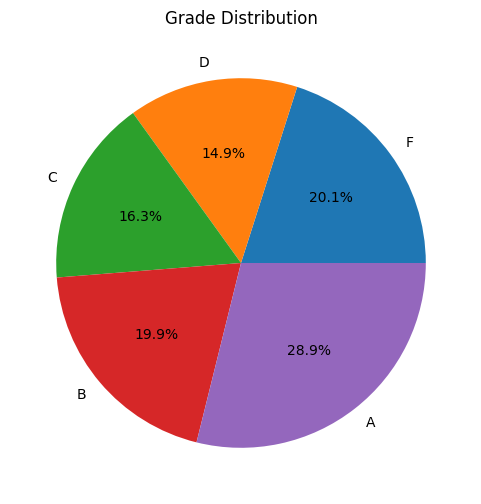

In [101]:
import matplotlib.pyplot as plt

grade_counts = marks['grade'].value_counts().sort_index()
plt.figure(figsize=(6, 6))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%')
plt.title('Grade Distribution')
plt.show()

# This Bar graph Shows the Section wise Grade Distribution

C:\Users\vishn\AppData\Local\Temp\ipykernel_4600\1594304154.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  section_grade = marks.groupby(['SECTION', 'grade']).size().unstack(fill_value=0)


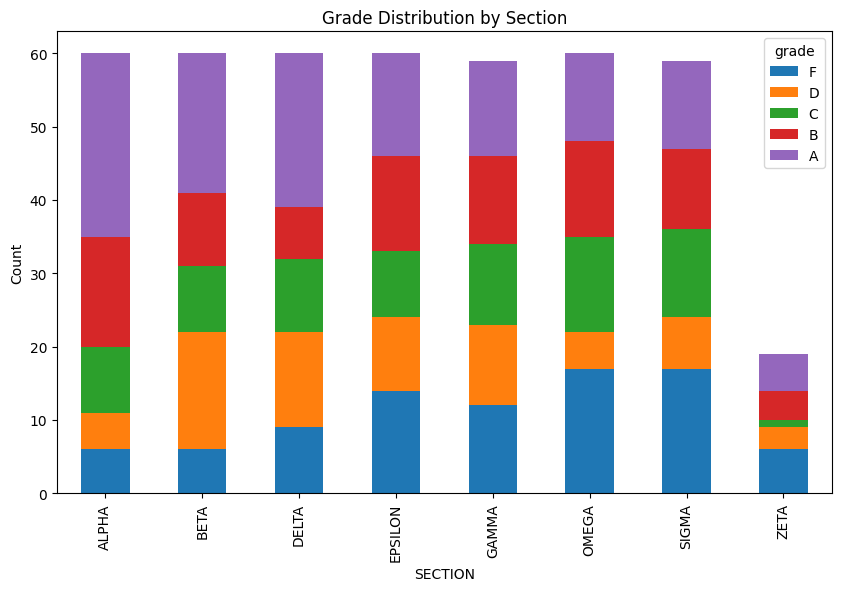

In [104]:
section_grade = marks.groupby(['SECTION', 'grade']).size().unstack(fill_value=0)
section_grade.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.ylabel('Count')
plt.title('Grade Distribution by Section')
plt.show()


# This bar graph shows Total marks obtained by Students

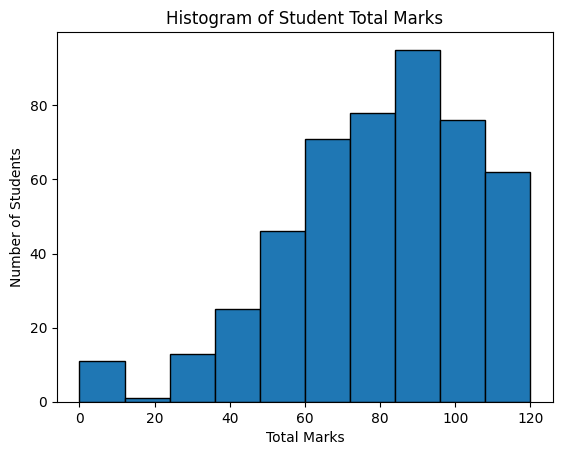

In [106]:
plt.hist(marks['TOTAL'], bins=10, edgecolor='black')
plt.xlabel('Total Marks')
plt.ylabel('Number of Students')
plt.title('Histogram of Student Total Marks')
plt.show()

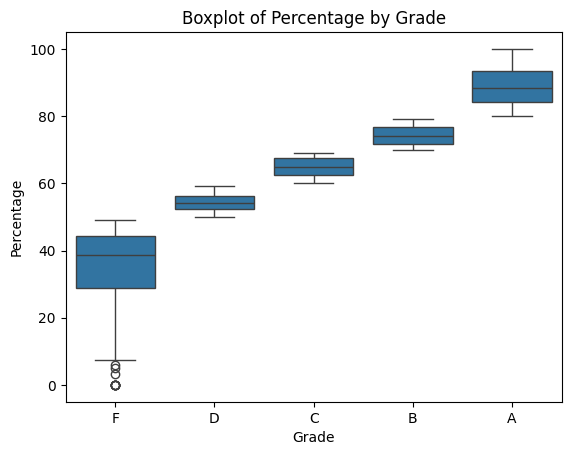

In [108]:
import seaborn as sns

sns.boxplot(x='grade', y='percentage', data=marks, order=grade_labels)
plt.xlabel('Grade')
plt.ylabel('Percentage')
plt.title('Boxplot of Percentage by Grade')
plt.show()

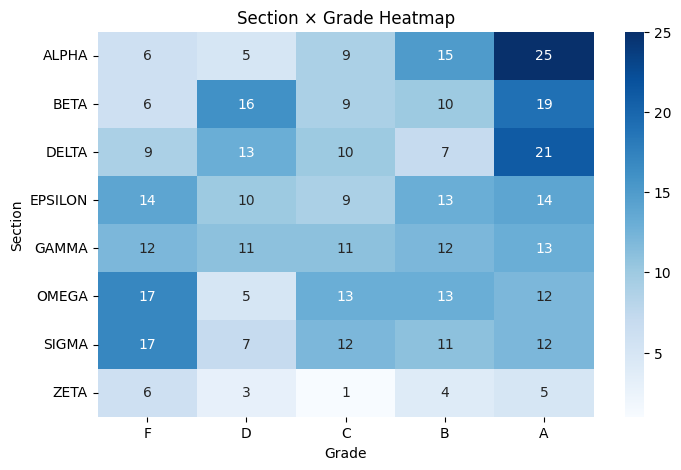

In [110]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.heatmap(section_grade, annot=True, fmt='d', cmap='Blues')
plt.title('Section × Grade Heatmap')
plt.xlabel('Grade')
plt.ylabel('Section')
plt.show()

In [112]:
# Get section-wise grade counts
section_grade = marks.groupby(['SECTION', 'grade']).size().unstack(fill_value=0)

# See the data as a DataFrame
print(section_grade)


grade     F   D   C   B   A
SECTION                    
ALPHA     6   5   9  15  25
BETA      6  16   9  10  19
DELTA     9  13  10   7  21
EPSILON  14  10   9  13  14
GAMMA    12  11  11  12  13
OMEGA    17   5  13  13  12
SIGMA    17   7  12  11  12
ZETA      6   3   1   4   5


C:\Users\vishn\AppData\Local\Temp\ipykernel_4600\1796363177.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  section_grade = marks.groupby(['SECTION', 'grade']).size().unstack(fill_value=0)


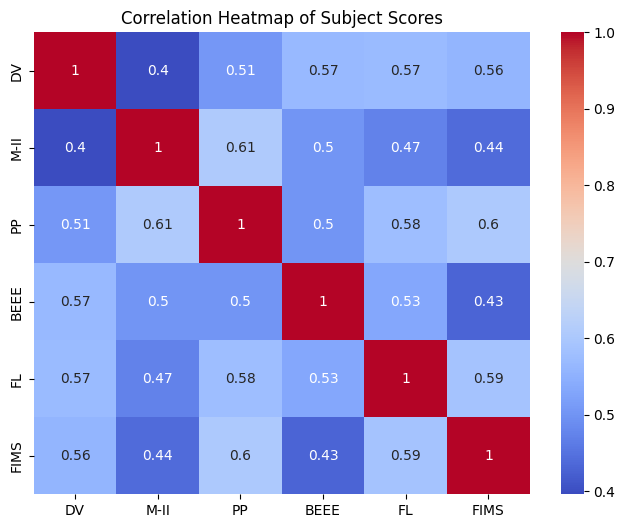

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select subject score columns
subject_cols = ['DV','M-II','PP','BEEE','FL','FIMS']
scores_df = marks[subject_cols]

plt.figure(figsize=(8,6))
sns.heatmap(scores_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Subject Scores')
plt.show()


# This plot describes the  comparison of one subject with the remaining subjects

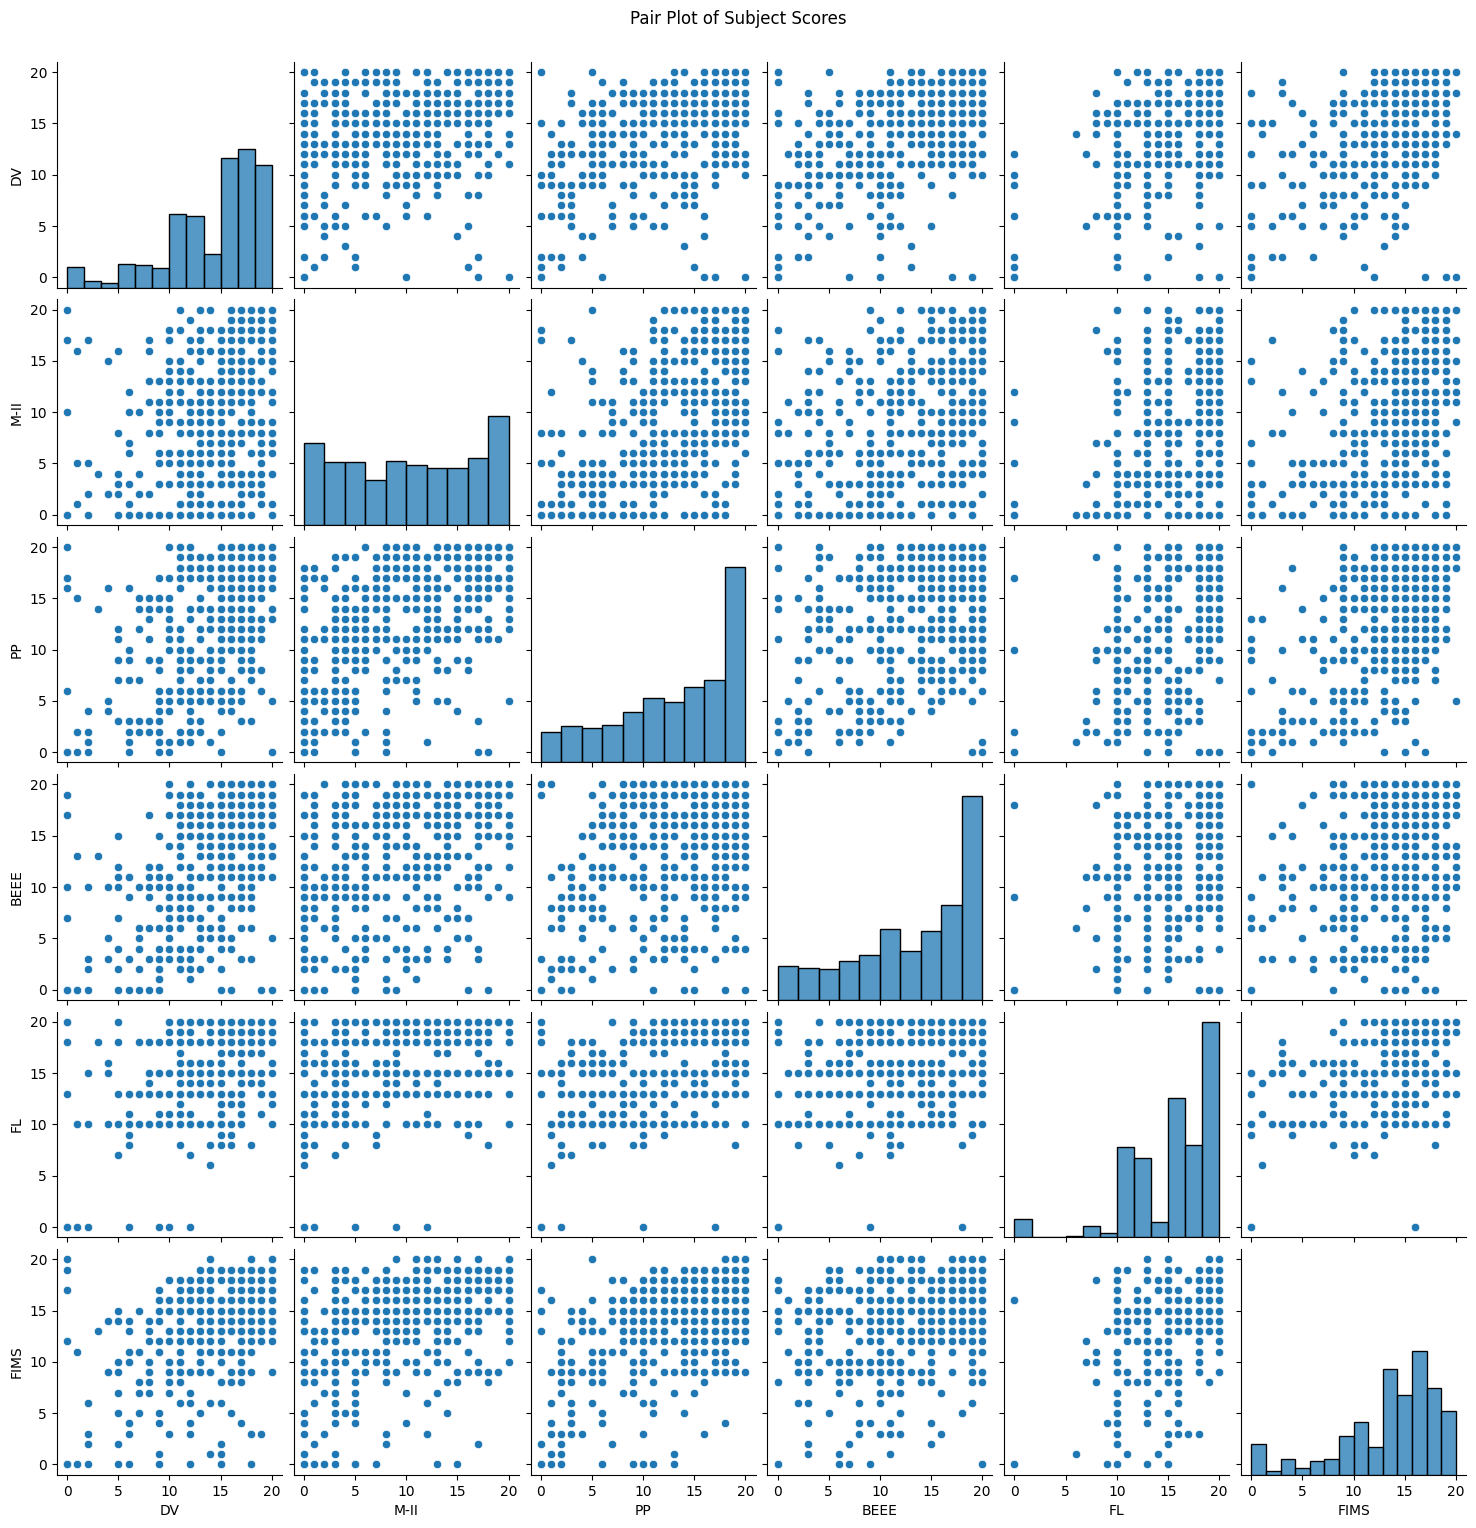

In [132]:
sns.pairplot(scores_df)
plt.suptitle('Pair Plot of Subject Scores', y=1.02)
plt.show()